# In this dataset

1. does it match the statistics of a high dimensional grid representation
2. Is the taurus real
3. test whether you can do the grid realignment like carpenter also in the big maze
4. show that correlation structure is preserved only in as far as cells are spatial

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import seaborn
import pandas as pd
#import cv2
import scipy.optimize as op
import sys
import scipy.stats as stt
import networkx as nx
import time
import matplotlib
import copy as cp
import scipy.ndimage as ndi 

import scipy as sp
import scipy.signal
seaborn.set(style='ticks',font_scale=1.5)


/Users/yves/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
poke_pos = np.array([1,-1])*np.array([ [149,0],
                                 [68,19],[231,19],
                               [0,62],[149,62],[298,62],
                                 [68,105],[231,105],
                                      [149,124]])

# From pycontrol

In [3]:
sys.path.append('/Users/yves/Documents/Code/mec_ephys/packages')

from mecll.rsync import Rsync_aligner
from mecll.load import load_data
from mecll.proc_beh import get_all_transition, get_transitions_state, build_poke_df, get_in_task_pokes
from mecll.proc_neural import get_all_resps, get_mean_resps, get_activity_for_each_poke
from mecll.plot.plot_activity_on_graph import plot_activity_on_graph, plot_cell

# Actual code

In [4]:
#Load behavioural data
root_path = '/Users/yves/Downloads/example_files/'

out = load_data(root_path)
spkT,spkC,single_units,events,lines,aligner = out

In [5]:
#process task data
all_poke_dict = get_in_task_pokes(lines,events)

In [6]:
df = build_poke_df(lines,events)


In [7]:
all_spk_store = get_activity_for_each_poke(df,spkT,spkC,single_units,aligner)

In [14]:
all_spk_store.shape

(320, 1255)

In [95]:
store = []

n_neurons = all_spk_store.shape[0]

for neuron_ix in range(n_neurons):
    tmp2 = []
    for port_nr in range(9):
        tmp1 = []
        for task_nr in df.task_nr.unique():

            is_correct = True
            v = df.loc[(df['port']==port_nr) &
                       (df['reward']==True) & 
                       (df['correct']==True) & 
                       (df['task_nr']==task_nr)
                      ]['time']


            v2 = df.loc[(df['port']==port_nr) &
                       (df['reward']==False) & 
                       (df['correct']==True) & 
                       (df['task_nr']==task_nr)
                      ]['time']
            
            mean_diff = np.nanmean(all_spk_store[neuron_ix,v.index])-np.nanmean(all_spk_store[neuron_ix,v2.index])
            tmp1.append(mean_diff)
        tmp2.append(tmp1)
    store.append(tmp2)

In [82]:
store_same = []

n_neurons = all_spk_store.shape[0]

for neuron_ix in range(n_neurons):
    tmp2 = []
    for port_nr in range(9):
        tmp1 = []
        for task_nr in df.task_nr.unique():

            is_correct = True
            v = df.loc[(df['port']==port_nr) &
                       (df['correct']==True) & 
                       (df['task_nr']==task_nr)
                      ]['time']

            n_fh = len(v.index)
            first_half_inds = int(np.floor(n_fh/2.))
            
            mean_diff = (np.nanmean(all_spk_store[neuron_ix,v.index[:first_half_inds]])-
                        np.nanmean(all_spk_store[neuron_ix,v.index[first_half_inds:]]))
            tmp1.append(mean_diff)
        tmp2.append(tmp1)
    store_same.append(tmp2)

In [96]:
store = np.array(store)
store_same = np.array(store_same)

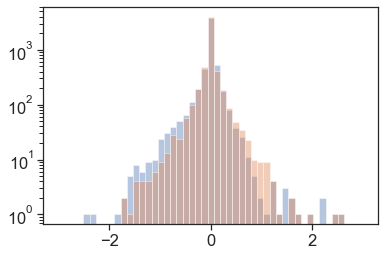

In [97]:
bns_ = np.linspace(-3,3,num=50)
seaborn.distplot(store.flatten(),kde=0,bins=bns_)
seaborn.distplot(store_same.flatten(),kde=0,bins=bns_)
plt.yscale('log')
#plt.ylim(0,100) 

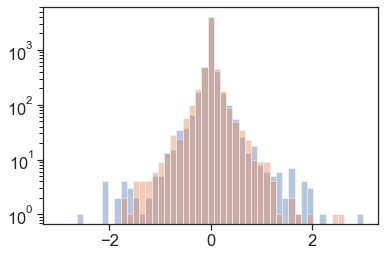

In [84]:
bns_ = np.linspace(-3,3,num=50)
seaborn.distplot(store.flatten(),kde=0,bins=bns_)
seaborn.distplot(store_same.flatten(),kde=0,bins=bns_)
plt.yscale('log')
#plt.ylim(0,100) 

In [89]:
np.var(store.flatten())

0.05649420492719417

In [90]:
np.var(store_same.flatten())

0.0451782754187296

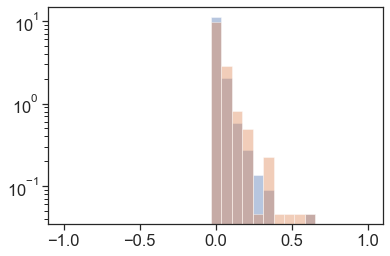

In [85]:
bns_ = np.linspace(-1,1,num=30)
seaborn.distplot(np.abs(np.nanmean(store,axis=(1,2))),kde=0,bins=bns_,norm_hist=1)
seaborn.distplot(np.abs(np.nanmean(store_same,axis=(1,2))),kde=0,bins=bns_,norm_hist=1)
plt.yscale('log')
#plt.ylim(0,100) 

Text(0, 0.5, 'Correct - Incorrect resps')

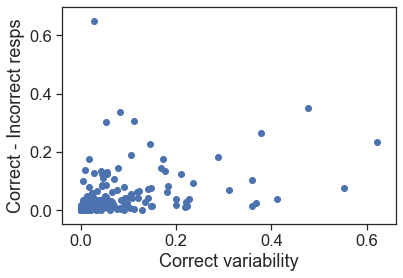

In [94]:
plt.scatter(np.abs(np.nanmean(store_same,axis=(1,2))),np.abs(np.nanmean(store,axis=(1,2))))
plt.xlabel("Correct variability")
plt.ylabel("Correct - Incorrect resps")

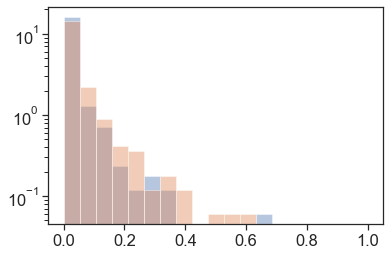

In [86]:
bns_ = np.linspace(0,1,num=20)
seaborn.distplot(np.abs(np.nanmean(store,axis=(1,2))),kde=0,bins=bns_,norm_hist=True)
seaborn.distplot(np.abs(np.nanmean(store_same,axis=(1,2))),kde=0,bins=bns_,norm_hist=True)
plt.yscale('log')
#plt.ylim(0,100) 

In [87]:
np.var(np.nanmean(store,axis=(1,2)))

0.004849488988608167

In [88]:
np.var(np.nanmean(store_same,axis=(1,2)))

0.009032488557415624

In [58]:
stt.ks_2samp(np.abs(store.flatten()),np.abs(store_same.flatten()))

Ks_2sampResult(statistic=0.10138888888888889, pvalue=3.499253709979043e-26)

In [31]:
np.max(store)

0.0

In [13]:
all_spk_store.shape

(320, 1255)

In [10]:
np.array(store).shape

(86, 9, 2)

In [39]:
len(df)

1255

In [37]:
v.index

Int64Index([ 466,  476,  479,  507,  510,  512,  515,  517,  533,  562,  564,
             567,  586,  589,  613,  639,  655,  692,  694,  696,  698,  720,
             755,  758,  778,  799,  801,  819,  822,  841,  860,  886, 1174,
            1194, 1212, 1216, 1218, 1222, 1224, 1238],
           dtype='int64')

In [34]:
df.task_nr.unique()

array(['0', '1'], dtype=object)

In [25]:
all_spk_store[5,v.index]

array([0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. ,
       0. , 0. , 0. , 0. , 0.3, 0.3, 0.3, 0. , 0. , 0. , 0. , 0. , 0. ,
       0.6, 0. , 0. , 0.9, 2.1, 0. , 0. , 0. , 0. , 0. , 1.5, 0. , 0. ,
       0. , 0. , 0.6, 1.2, 0. , 0. , 0. , 0. , 0.9, 0. , 1.8, 0. , 0. ,
       0. , 0. , 0.6, 0. , 0. , 0. , 0.9, 0.6, 0. , 0.6, 0. , 0. , 0. ,
       0. , 0. ])

In [27]:
is_correct = False
v2 = df.loc[(df['port']==port_nr) &
           (df['correct']==is_correct) & 
           #(df['next_correct']==True) &
           #(df['reward']==True) &
           #(df['port_repeat']==False) & 
           (df['task_nr']==task_nr)
          ]['time']


In [31]:
np.mean(all_spk_store[5,v.index])

0.21492537313432833

In [30]:
np.mean(all_spk_store[5,v2.index])

0.09999999999999999

In [33]:
stt.ks_2samp(all_spk_store[5,v.index],all_spk_store[5,v2.index])

Ks_2sampResult(statistic=0.1256218905472637, pvalue=0.9017210985592835)